# 1.导入我们所需要的库

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# 2.导入我们的数据appl.xlsx,目录为当前文件夹

##   读取到appl数据赋值apple,查看前五行的信息

In [2]:
apple = pd.read_csv("./appl_1980_2014.csv")

In [3]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014/7/8,96.27,96.80,93.92,95.35,65130000,95.35
1,2014/7/7,NaN,95.99,94.10,95.97,56305400,95.97
2,2014/7/3,93.67,94.10,93.20,94.03,22891800,94.03
3,2014/7/2,93.87,94.06,93.09,NaN,28420900,93.48
4,2014/7/1,93.52,94.07,93.13,93.52,38170200,93.52


## 3.查看数据集的信息

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8467 non-null   object 
 1   Open       8466 non-null   float64
 2   High       8467 non-null   float64
 3   Low        8467 non-null   float64
 4   Close      8466 non-null   float64
 5   Volume     8467 non-null   int64  
 6   Adj Close  8467 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.2+ KB


In [5]:
apple.describe()

,Open,High,Low,Close,Volume,Adj Close
count,8466.000000,8467.000000,8467.000000,8466.000000,8.467000e+03,8467.000000
mean,98.592952,99.846916,97.225345,98.548149,9.390059e+07,11.114023
std,141.956990,143.138810,140.531755,141.868893,8.992465e+07,21.166682
min,11.120000,11.120000,11.000000,11.000000,2.504000e+05,0.170000
25%,25.750000,26.000000,25.120000,25.630000,3.704820e+07,0.900000
50%,40.750000,41.500000,40.000000,40.780000,6.632360e+07,1.410000
75%,79.687500,81.030000,78.750000,80.000000,1.177676e+08,8.680000
max,702.410000,705.070000,699.570000,702.100000,1.855410e+09,96.280000


## 4.发现第一行和第四行有空值,进行填充,选择填充方式为bfill,既从后面选值进行填充 

In [6]:
apple.fillna(method = 'bfill')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014/7/8,96.27,96.80,93.92,95.35,65130000,95.35
1,2014/7/7,93.67,95.99,94.10,95.97,56305400,95.97
2,2014/7/3,93.67,94.10,93.20,94.03,22891800,94.03
3,2014/7/2,93.87,94.06,93.09,93.52,28420900,93.48
4,2014/7/1,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8462,1980/12/18,26.63,26.75,26.63,26.63,18362400,0.41
8463,1980/12/17,25.87,26.00,25.87,25.87,21610400,0.40
8464,1980/12/16,25.37,25.37,25.25,25.25,26432000,0.39
8465,1980/12/15,27.38,27.38,27.25,27.25,43971200,0.42


# 5.将日期Date列转换为日期时间类型

In [7]:
apple['Date']=pd.to_datetime(apple['Date'])

In [8]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,NaN,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,NaN,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


# 6.  将日期设置为索引

In [9]:
apple.set_index("Date",inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,NaN,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,NaN,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


## 查看是否有重复的数据,有几个?并将重复的数据删除

In [10]:
print(len(apple.duplicated()[apple.duplicated()==True]))

2


In [11]:
apple.drop_duplicates(inplace=True)

In [12]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8464 non-null   float64
 1   High       8465 non-null   float64
 2   Low        8465 non-null   float64
 3   Close      8464 non-null   float64
 4   Volume     8465 non-null   int64  
 5   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


# 8.讲apple根据索引排序，显示前五条数据

In [16]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close,Two Adj Close
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,0.90
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,0.84
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,0.78
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,0.80
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,0.82


## 9.使用apply方法创建一个值为 Adj Close 列2倍的新列 Two Adj Close

In [17]:
apple['Two Adj Close'] = apple['Adj Close']*2

In [18]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close,Two Adj Close
Date,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,190.70
2014-07-07,NaN,95.99,94.10,95.97,56305400,95.97,191.94
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,188.06
2014-07-02,93.87,94.06,93.09,NaN,28420900,93.48,186.96
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,187.04


# 10. 绘制“Adj Close”值,标题为Apple Stock。将图形的大小设置为13.5 x 9大小的折线图

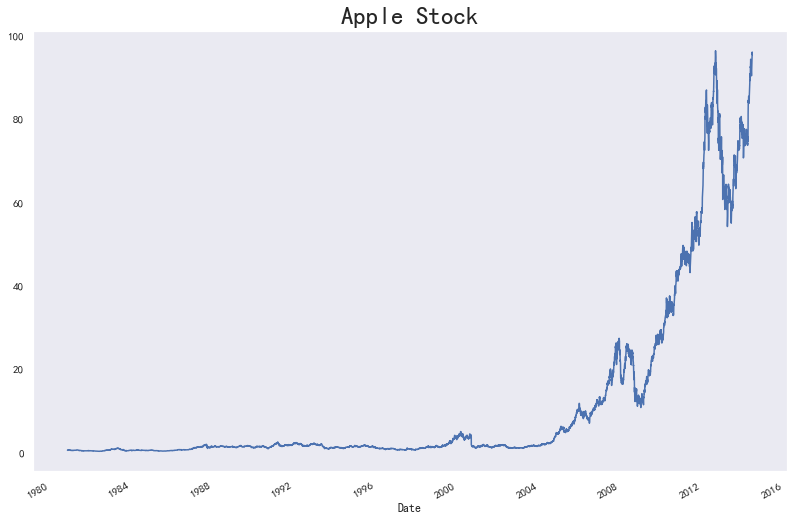

In [26]:
plt.figure(figsize=(13.5,9))
apple['Adj Close'].plot()
plt.title("Apple Stock",fontsize=25)
plt.show()

## 11.使用seaborn的dark主题绘图, 画出TwoAdjclose列的直方图

In [22]:
import seaborn as sns

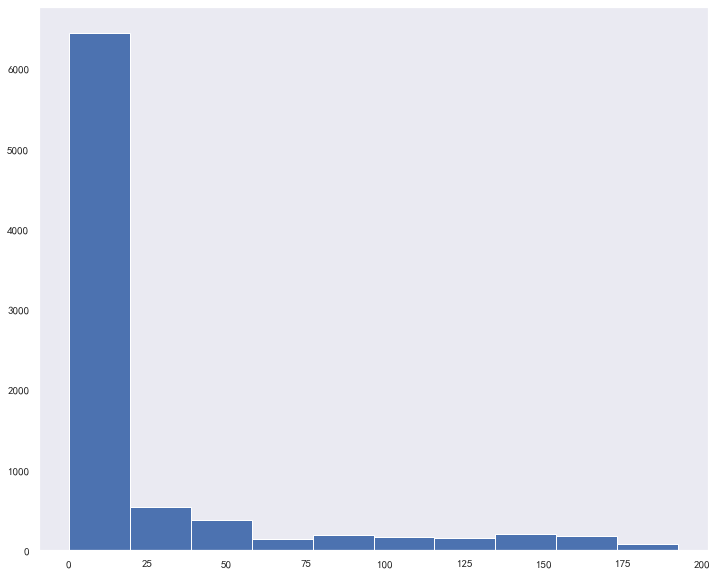

In [25]:
plt.figure(figsize=(12,10))
data = apple['Two Adj Close']
sns.set(style='dark',font='SimHei')
plt.hist(data)
plt.show()